# Preprocessing of GSE31312
Preprocessing of DLBCL dataset GSE31312. It includes gene expression data and clinical data with gene expression phenotype: GCB type and ABC type.

In [8]:
import os
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%precision 4
plt.rcParams["figure.facecolor"] = 'w'

ROOT= "/".join(os.getcwd().split("/")[:-1])

# Preprocess RAW data
.CEL dataset was normalized by RMA using R package affy.  
Then datasets are standardized by case.

In [9]:
# Chip to Symbol
chip_file_path = os.path.join(ROOT, "data", "GSEA", "geneset", "Human_AFFY_HG_U133_MSigDB.v7.3.chip")
chip_to_symbol = pd.read_csv(chip_file_path, sep="\t", index_col=0)
chip_to_symbol_dict = chip_to_symbol["Gene Symbol"].to_dict()
chip_to_symbol

,Gene Symbol,Gene Title
Probe Set ID,,
1007_s_at,DDR1,discoidin domain receptor tyrosine kinase 1 [S...
1053_at,RFC2,replication factor C subunit 2 [Source:HGNC Sy...
117_at,HSPA6,heat shock protein family A (Hsp70) member 6 [...
121_at,PAX8,paired box 8 [Source:HGNC Symbol;Acc:HGNC:8622]
1255_g_at,GUCA1A,guanylate cyclase activator 1A [Source:HGNC Sy...
...,...,...
AFFX-HUMRGE/M10098_5_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...
AFFX-HUMRGE/M10098_M_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...
AFFX-r2-Hs18SrRNA-5_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...


In [10]:
# ID list
file_path = os.path.join(ROOT, "data", "GSE31312", "GSE31312_series_matrix.txt.gz")
df = pd.read_csv(file_path, sep="\t", skiprows=lambda x: x not in range(41, 44), header=0, index_col=0).T
df.columns = [c.replace("!", "") for c in df.columns]
id_list = df["Sample_geo_accession"].values

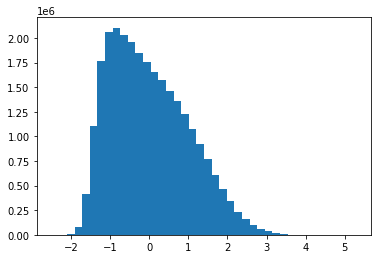

In [11]:
# Standardize dataset.
file_path = os.path.join(ROOT, "RStudio/affymetrix", "GSE31312_rma_expression.txt")
rma_df = pd.read_table(file_path, sep="\t", index_col=0, header=0).T
rma_df.index = [file.split(".")[0] for file in rma_df.index]
rma_df = rma_df.loc[id_list,:]
rma_df[rma_df < 1] = 1
rma_df[rma_df.isna()] = 1
rma_df.columns.name = "ID_REF"
probe_col = rma_df.columns
rma_df = np.log2(rma_df)
rma_df = pd.DataFrame(scipy.stats.zscore(rma_df, axis=1), index=id_list, columns=probe_col) # convert to mean=0, std=1
ax = plt.hist(rma_df.values.reshape(-1),40)
plt.show()

In [12]:
# Convert probe-level expression to gene-level expression.
rma_symbol_df = rma_df.T.copy()
rma_symbol_df.index = rma_symbol_df.index.map(chip_to_symbol_dict)
rma_symbol_df = rma_symbol_df.dropna()
rma_symbol_df = rma_symbol_df.groupby("ID_REF").mean()
rma_symbol_df = rma_symbol_df.T

expression_path = os.path.join(ROOT, "data", "GSE31312", "rma_expression.pickle")
rma_symbol_df.to_pickle(expression_path)
rma_symbol_df

ID_REF,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM775979,-0.445413,0.974854,-1.131737,0.953313,-0.103940,-1.283625,1.015605,-0.904019,-0.773023,-0.331194,...,0.817213,1.536868,0.316249,-0.471715,0.207069,-0.983242,0.227788,1.309177,-0.209387,0.147435
GSM775980,-0.538647,1.049531,-1.221021,0.822684,-0.303179,-1.345194,1.122455,-1.151174,-0.472094,0.089877,...,0.741455,1.490970,0.281353,-0.539874,-0.050897,-0.686204,0.218518,1.366564,0.173638,0.127200
GSM775981,-0.903170,1.190397,-1.053081,0.878968,0.074258,-1.247167,1.949030,-0.841535,-1.056798,0.253460,...,0.490498,0.476345,0.429397,-0.768722,-0.884456,-0.308542,0.348328,1.512702,-0.264023,-0.087379
GSM775982,-0.815510,1.083783,-1.234068,1.055404,1.234007,-0.974906,1.415406,-1.343088,-0.721395,-0.211115,...,0.684876,1.532525,0.422905,-0.513952,0.103938,-0.618689,0.333619,1.606615,-0.507785,0.475631
GSM775983,-0.610133,1.056514,-1.102859,0.943824,-0.221857,-1.127360,1.391071,-0.769280,-0.509798,0.010962,...,0.796107,1.315506,0.064853,-0.907656,-0.496189,0.245052,0.007159,1.244980,-0.055874,0.636935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM776472,-0.936451,0.864129,-0.854037,0.575910,0.382270,-1.161775,1.323068,-0.806342,-0.626837,-0.076334,...,1.009850,1.355277,-0.550561,-0.952800,-0.272486,-0.877974,0.268736,0.877231,-0.379591,-0.005350
GSM776473,-1.144753,0.822862,-0.988088,0.552049,-0.601570,-0.811208,0.846717,-1.533606,-1.175402,-0.234997,...,0.680500,1.964147,-0.330634,-0.155873,-0.213250,-0.936401,-0.096237,1.303482,-0.291612,-0.288918
GSM776474,0.093627,1.002625,-0.528097,0.439113,-0.435832,-0.888384,1.503336,-0.764454,-0.631177,0.542710,...,0.407765,1.528834,-0.048042,-0.728553,-0.179679,-0.178575,-0.339619,1.453188,-0.439065,-0.165304
GSM776475,-0.569944,1.008914,-1.208560,0.729061,-0.565555,-1.036648,1.121261,-1.318245,-1.451706,0.089375,...,0.321716,1.716861,-0.116031,-0.740810,-0.189752,-0.409881,-0.164739,1.577590,-0.091424,0.824645


# Gene expression profiling data

In [13]:
file_path = os.path.join(ROOT, "data", "GSE31312", "GSE31312_series_matrix.txt.gz")
df = pd.read_csv(file_path, sep="\t", skiprows=lambda x: x not in range(41, 76), header=0, index_col=0).T
df.columns = [c.replace("!", "") for c in df.columns]

In [14]:
file_path = os.path.join(ROOT, "data", "GSE31312", "GSE31312_Microarray_and_clinical_data_DLBCL_475_cases_PMID_22437443.csv")
clinical_df = pd.read_csv(file_path, index_col=0, header=0)
clinical_df = clinical_df.set_index("GEO Depository #")
merged_df = clinical_df.join(df)
clinical_df_path = os.path.join(ROOT, "data", "GSE31312", "clinical.csv")
merged_df = merged_df.set_index("Sample_geo_accession")
merged_df = merged_df[~merged_df.index.isna()]
merged_df.to_csv(clinical_df_path)